In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [48]:
df = pd.read_csv("data/data_questionnaires_preprocessed.csv")

In [4]:
print("In total, there were {} participants.".format(len(df)))

In total, there were 7 participants.


In [5]:
print("{} participants were in the blob condition, {} in the avatar condition.".format(df["blob"].value_counts()[1], df["blob"].value_counts()[0]))

4 participants were in the blob condition, 3 in the avatar condition.


In [91]:
def createBoxplot(data, ax, title, labels=None, xlabel='', fontsize=12):
    sns.boxplot(data=data, ax=ax)
    if labels:
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels) 
    ax.set_title(title, pad=20, fontsize=fontsize)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')

In [67]:
def secondXAxis(originalaxis, xticks, minorlocations, minorlabels):
    # Second X-axis
    ax2 = originalaxis.twiny()

    ax2.spines["bottom"].set_position(("axes", -0.1))
    ax2.tick_params('both', length=0, width=0, which='minor')
    ax2.tick_params('both', direction='in', which='major')
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")

    ax2.set_xticks(xticks)
    ax2.xaxis.set_major_formatter(ticker.NullFormatter())
    ax2.xaxis.set_minor_locator(ticker.FixedLocator(minorlocations))
    ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(minorlabels))

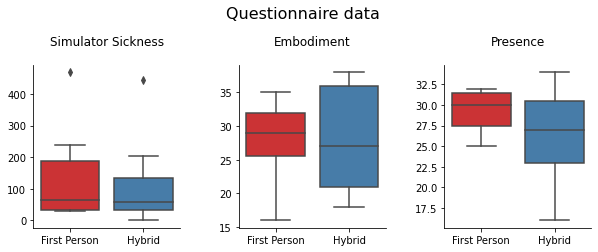

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Questionnaire data', fontsize=16, y=1.15)

axes = axes.ravel()

sns.set_palette("Set1")

createBoxplot(df[["SSQ_TS_FP", "SSQ_TS_H"]], axes[0], "Simulator Sickness", ["First Person", "Hybrid"])
createBoxplot(df[["EB_EB_FP", "EB_EB_H"]], axes[1], "Embodiment", ["First Person", "Hybrid"])
createBoxplot(df[["EB_SP_FP", "EB_SP_H"]], axes[2], "Presence", ["First Person", "Hybrid"])

sns.despine()

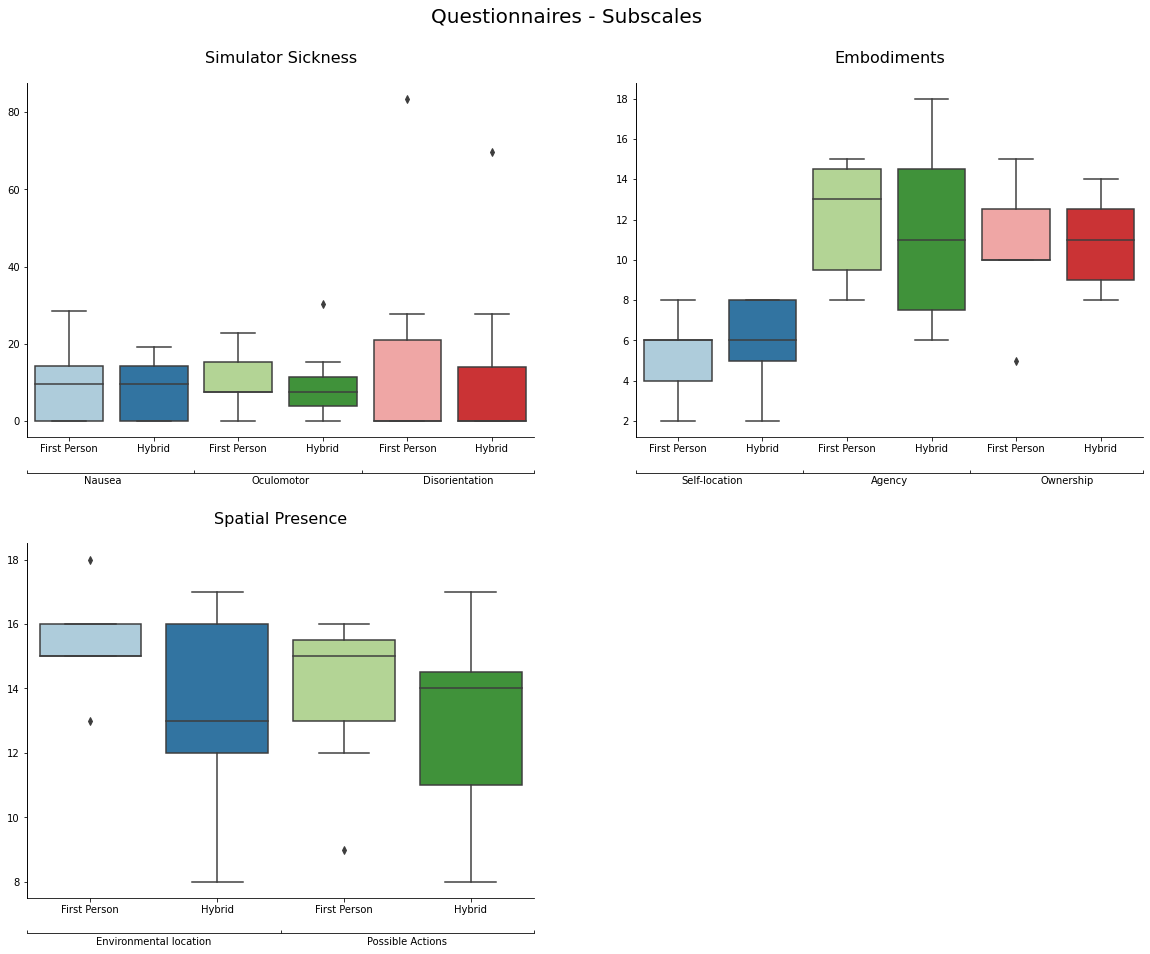

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
fig.suptitle("Questionnaires - Subscales", y=0.95, fontsize=20)
plt.subplots_adjust(hspace=0.3)
sns.set_palette("Paired")
axes = axes.ravel()

createBoxplot(df[['SSQ_N_FP', 'SSQ_N_H', 
                  'SSQ_O_FP', 'SSQ_O_H',
                  'SSQ_D_FP', 'SSQ_D_H']], 
              axes[0], 
              "Simulator Sickness",
             ["First Person", "Hybrid"]*3,
             fontsize=16)
secondXAxis(axes[0], [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Nausea', 'Oculomotor', 'Disorientation'])

createBoxplot(df[['EB_SL_FP', 'EB_SL_H',
                  'EB_A_FP', 'EB_A_H',
                  'EB_O_FP', 'EB_O_H']], 
              axes[1], 
              "Embodiments",
             ["First Person", "Hybrid"]*3,
             fontsize=16)
secondXAxis(axes[1], [0.0, 0.33, 0.66, 1.0], [0.15, 0.5, 0.85], ['Self-location', 'Agency', 'Ownership'])

createBoxplot(df[['EB_EL_FP', 'EB_EL_H',
                  'EB_PA_FP', 'EB_PA_H']], 
              axes[2], 
              "Spatial Presence",
             ["First Person", "Hybrid"]*2,
             fontsize=16)

secondXAxis(axes[2], [0.0,0.5, 1.0], [0.25, 0.75], ['Environmental location', 'Possible Actions'])

axes[3].axis("off")
              
sns.despine()

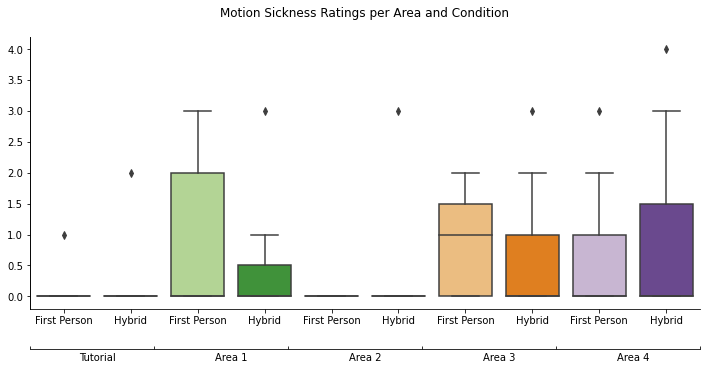

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.set_palette("Paired")

createBoxplot(df[["FP_0_MS", "H_0_MS",
                  "FP_1_MS", "H_1_MS", 
                  "FP_2_MS", "H_2_MS",
                  "FP_3_MS", "H_3_MS",
                  "FP_4_MS", "H_4_MS",]], 
              axes, 
              "Motion Sickness Ratings per Area and Condition", 
              ["First Person", "Hybrid"]*5)

secondXAxis(axes, [0.0, 0.185, 0.385, 0.585, 0.785, 1.0], [0.1, 0.3, 0.5, 0.7, 0.9], ['Tutorial', 'Area 1', 'Area 2', 'Area 3', 'Area 4'])

sns.despine()


In [12]:
df[['SSQ_N_FP', 'SSQ_O_FP', 'SSQ_D_FP', 'SSQ_TS_FP','SSQ_N_H', 'SSQ_O_H', 'SSQ_D_H', 'SSQ_TS_H','SSQ_N_AVG', 'SSQ_O_AVG', 'SSQ_D_AVG', 'SSQ_TS_AVG']].describe().round(decimals=2)

,SSQ_N_FP,SSQ_O_FP,SSQ_D_FP,SSQ_TS_FP,SSQ_N_H,SSQ_O_H,SSQ_D_H,SSQ_TS_H,SSQ_N_AVG,SSQ_O_AVG,SSQ_D_AVG,SSQ_TS_AVG
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,9.54,10.83,17.90,143.11,8.18,9.75,13.92,119.09,8.86,10.29,15.91,131.10
std,11.02,8.59,30.83,163.05,8.58,10.46,26.65,157.97,9.71,9.21,28.62,159.88
min,0.00,0.00,0.00,28.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.17
25%,0.00,7.58,0.00,32.01,0.00,3.79,0.00,32.01,0.00,5.68,0.00,32.01
50%,9.54,7.58,0.00,64.03,9.54,7.58,0.00,56.70,9.54,7.58,0.00,64.03
75%,14.31,15.16,20.88,188.31,14.31,11.37,13.92,133.93,14.31,13.26,17.40,159.29
max,28.62,22.74,83.52,468.77,19.08,30.32,69.60,445.06,23.85,26.53,76.56,456.92


In [53]:
df[['P_FP', 'P_H', 'P_AVG']].describe().round(decimals=2).rename(columns={'P_FP': 'Presence First Person', 'P_H': 'Hybrid', 'P_AVG': 'Average'})

,Presence First Person,Hybrid,Average
count,7.00,7.00,7.00
mean,110.43,104.57,107.50
std,12.65,14.11,12.41
min,89.00,79.00,84.00
25%,107.00,99.00,104.25
50%,110.00,112.00,108.50
75%,114.50,113.50,115.00
max,131.00,116.00,121.50


In [59]:
# Embodiment subscales + total
cols = {'EB_SL_FP': 'Self-Location First Person', 'EB_A_FP': 'Agency First Person', 'EB_O_FP': 'Ownership First Person',
       'EB_SL_H': 'Self-Location Hybrid', 'EB_A_H': 'Agency Hybrid', 'EB_O_H': 'Ownership Hybrid',
       'EB_EB_FP': 'Average First Person', 'EB_EB_H': 'Averagel Hybrid', 'EB_EB_AVG' : 'Total Average'}
df[['EB_SL_FP', 'EB_A_FP', 'EB_O_FP', 'EB_EB_FP', 'EB_SL_H', 'EB_A_H', 'EB_O_H', 'EB_EB_H', 'EB_EB_AVG']].describe().round(decimals=2).rename(columns=cols)

,Self-Location First Person,Agency First Person,Ownership First Person,Average First Person,Self-Location Hybrid,Agency Hybrid,Ownership Hybrid,Averagel Hybrid,Total Average
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,5.14,12.00,10.71,27.86,6.00,11.29,10.86,28.14,28.00
std,2.04,2.94,3.15,6.47,2.24,4.61,2.34,8.51,6.88
min,2.00,8.00,5.00,16.00,2.00,6.00,8.00,18.00,17.00
25%,4.00,9.50,10.00,25.50,5.00,7.50,9.00,21.00,24.00
50%,6.00,13.00,10.00,29.00,6.00,11.00,11.00,27.00,28.00
75%,6.00,14.50,12.50,32.00,8.00,14.50,12.50,36.00,33.50
max,8.00,15.00,15.00,35.00,8.00,18.00,14.00,38.00,36.00


In [60]:
# Spatial Presence subscales + total
cols = {'EB_EL_FP': 'Environmental Location First Person', 'EB_PA_FP': 'Possible Actions First Person',
       'EB_EL_H': 'Environmental Location Hybrid', 'EB_PA_H': 'Possible Actions Hybrid',
       'EB_SP_FP': 'Average First Person', 'EB_SP_H': 'Averagel Hybrid', 'EB_SP_AVG' : 'Total Average'}

df[['EB_EL_FP', 'EB_PA_FP', 'EB_SP_FP', 'EB_EL_H', 'EB_PA_H', 'EB_SP_H', 'EB_SP_AVG']].describe().round(decimals=2).rename(columns=cols)

,Environmental Location First Person,Possible Actions First Person,Average First Person,Environmental Location Hybrid,Possible Actions Hybrid,Averagel Hybrid,Total Average
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,15.43,13.86,29.29,13.43,12.86,26.29,27.79
std,1.51,2.54,3.04,3.26,3.08,6.16,4.43
min,13.00,9.00,25.00,8.00,8.00,16.00,20.50
25%,15.00,13.00,27.50,12.00,11.00,23.00,25.25
50%,15.00,15.00,30.00,13.00,14.00,27.00,28.50
75%,16.00,15.50,31.50,16.00,14.50,30.50,31.00
max,18.00,16.00,32.00,17.00,17.00,34.00,33.00
